In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
buil_owner=pd.read_csv('Building_Ownership_Use.csv')
structure=pd.read_csv('Building_Structure.csv')

In [3]:
structure.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq']

In [4]:
#drop district_id , vdcmun_id,ward_id 
#add a new column (difference_in_floor_count)  and remove pre and post eq floor count
#add a new column (difference_in_height) and remove pre and post eq floor count


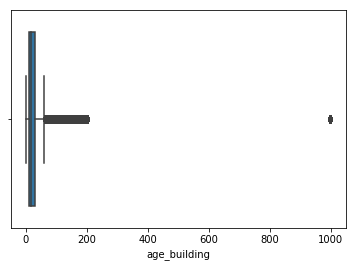

In [5]:
sns.boxplot(x=structure.age_building)

In [6]:
structure.loc[structure.age_building>200,'age_building']=50

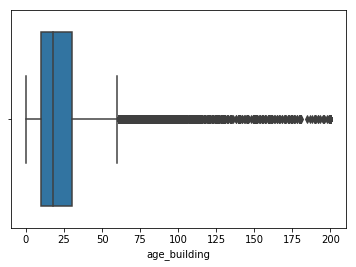

In [7]:
sns.boxplot(x=structure.age_building)

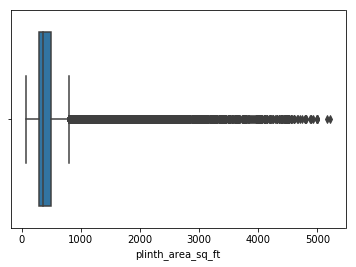

In [8]:
sns.boxplot(x=structure.plinth_area_sq_ft)

In [9]:
structure.land_surface_condition.describe()

count     1052948
unique          3
top          Flat
freq       874202
Name: land_surface_condition, dtype: object

In [10]:
structure.land_surface_condition=LabelEncoder().fit_transform(structure['land_surface_condition'])

In [11]:
structure.land_surface_condition.value_counts()

0    874202
1    144748
2     33998
Name: land_surface_condition, dtype: int64

In [12]:
structure.foundation_type.value_counts()

Mud mortar-Stone/Brick    886331
Bamboo/Timber              60598
Cement-Stone/Brick         57354
RC                         42808
Other                       5857
Name: foundation_type, dtype: int64

In [13]:
structure.foundation_type=LabelEncoder().fit_transform(structure['foundation_type'])

In [14]:
structure.loc[structure.foundation_type == 3, 'foundation_type'] = np.nan

In [15]:
structure.foundation_type.value_counts()

2.0    886331
0.0     60598
1.0     57354
4.0     42808
Name: foundation_type, dtype: int64

In [16]:
structure['foundation_type']=structure['foundation_type'].ffill()

In [17]:
structure.foundation_type=structure.foundation_type.astype(int)

In [18]:
structure.roof_type=LabelEncoder().fit_transform(structure['roof_type'])

In [19]:
structure.ground_floor_type=LabelEncoder().fit_transform(structure['ground_floor_type'])

In [20]:
structure.loc[structure.ground_floor_type ==2, 'ground_floor_type'] = np.nan
structure.loc[structure.ground_floor_type ==4, 'ground_floor_type'] = np.nan

In [21]:
structure['ground_floor_type']=structure['ground_floor_type'].ffill()

In [22]:
structure.ground_floor_type.value_counts()

1.0    851819
0.0    101210
3.0     99919
Name: ground_floor_type, dtype: int64

In [23]:
structure.other_floor_type.value_counts()

TImber/Bamboo-Mud    666182
Timber-Planck        177571
Not applicable       160301
RCC/RB/RBC            48894
Name: other_floor_type, dtype: int64

In [24]:
structure['position']=structure['position'].fillna('Not attached')

In [25]:
structure.position=LabelEncoder().fit_transform(structure['position'])

In [26]:
structure.position.value_counts()

3    816365
0    173459
1     53522
2      9602
Name: position, dtype: int64

In [27]:
structure.plan_configuration.describe()

count         1052947
unique             10
top       Rectangular
freq          1009987
Name: plan_configuration, dtype: object

In [28]:
structure.plan_configuration=structure.plan_configuration.fillna('Rectangular')

In [29]:
structure.plan_configuration=LabelEncoder().fit_transform(structure['plan_configuration'])

In [30]:
structure.loc[structure.plan_configuration==2,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==1,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==0,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==9,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==5,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==8,'plan_configuration']=np.nan



In [31]:
structure.plan_configuration.unique()

array([ 6.,  3.,  7., nan,  4.])

In [32]:
structure['plan_configuration']=structure['plan_configuration'].ffill()

In [33]:
structure.plan_configuration.value_counts()

6.0    1012996
7.0      23207
3.0      15313
4.0       1432
Name: plan_configuration, dtype: int64

In [34]:
structure.plan_configuration=LabelEncoder().fit_transform(structure['plan_configuration'])

In [35]:
structure.plan_configuration.value_counts()

2    1012996
3      23207
0      15313
1       1432
Name: plan_configuration, dtype: int64

In [36]:
structure.condition_post_eq.value_counts()

Damaged-Not used                           249464
Damaged-Repaired and used                  211119
Damaged-Used in risk                       187480
Damaged-Rubble unclear                     145732
Damaged-Rubble clear                       132508
Not damaged                                 71587
Damaged-Rubble Clear-New building built     54587
Covered by landslide                          471
Name: condition_post_eq, dtype: int64

In [37]:
structure['condition_post_eq']=LabelEncoder().fit_transform(structure['condition_post_eq'])


In [38]:
structure.loc[structure.condition_post_eq==0,'condition_post_eq']=np.nan

In [39]:
structure['condition_post_eq']=structure['condition_post_eq'].ffill()

In [40]:
structure.condition_post_eq.value_counts()

1.0    249512
2.0    211174
6.0    187514
5.0    145912
4.0    132624
7.0     71597
3.0     54615
Name: condition_post_eq, dtype: int64

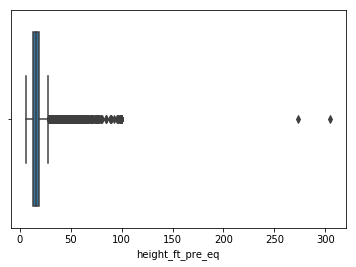

In [41]:
sns.boxplot(x=structure.height_ft_pre_eq)

In [42]:
structure.loc[structure.height_ft_pre_eq>100,'height_ft_pre_eq']=16

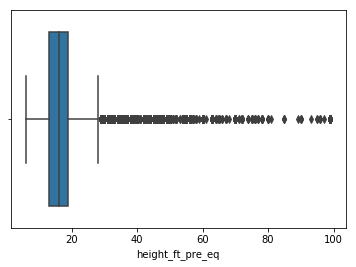

In [43]:
sns.boxplot(x=structure.height_ft_pre_eq)

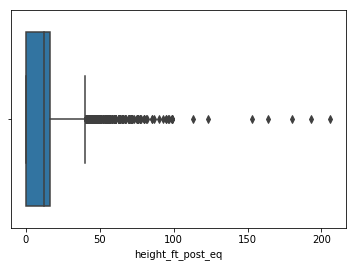

In [44]:
sns.boxplot(x=structure.height_ft_post_eq)

In [45]:
structure.loc[structure.height_ft_post_eq>100,'height_ft_post_eq']=12

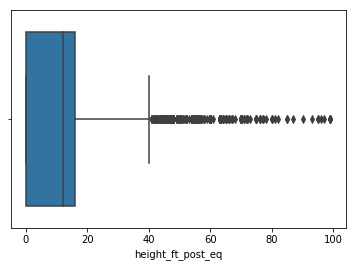

In [46]:
sns.boxplot(x=structure.height_ft_post_eq)

In [47]:
structure['diff_in_height']=structure['height_ft_pre_eq']-structure['height_ft_post_eq']

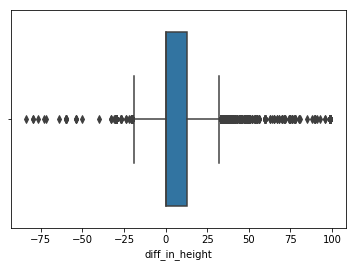

In [48]:
sns.boxplot(x=structure.diff_in_height)

In [49]:
count=structure.diff_in_height<0

In [50]:
count.value_counts()

False    1049846
True        3102
Name: diff_in_height, dtype: int64

In [51]:
structure.diff_in_height.describe()

count    1.052948e+06
mean     5.926491e+00
std      8.311473e+00
min     -8.400000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.300000e+01
max      9.900000e+01
Name: diff_in_height, dtype: float64

In [52]:
structure.loc[structure.diff_in_height<0,'diff_in_height']=6

In [53]:
structure.diff_in_height.describe()

count    1.052948e+06
mean     5.960575e+00
std      8.278139e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.300000e+01
max      9.900000e+01
Name: diff_in_height, dtype: float64

In [54]:
structure.count_floors_pre_eq.value_counts()

2    632969
3    225046
1    162594
4     22263
5      9102
6       814
7       128
8        18
9        14
Name: count_floors_pre_eq, dtype: int64

In [55]:
structure.loc[structure.count_floors_pre_eq == 6, 'count_floors_pre_eq'] = np.nan
structure.loc[structure.count_floors_pre_eq == 7, 'count_floors_pre_eq'] = np.nan
structure.loc[structure.count_floors_pre_eq == 8, 'count_floors_pre_eq'] = np.nan
structure.loc[structure.count_floors_pre_eq == 9, 'count_floors_pre_eq'] = np.nan


In [56]:
structure['count_floors_pre_eq']=structure['count_floors_pre_eq'].ffill()

In [57]:
structure.count_floors_pre_eq.value_counts()

2.0    633076
3.0    225231
1.0    162639
4.0     22561
5.0      9441
Name: count_floors_pre_eq, dtype: int64

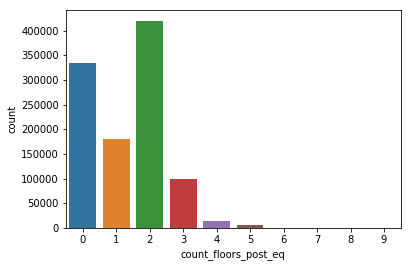

In [58]:
sns.countplot(x=structure.count_floors_post_eq)

In [59]:
structure.count_floors_post_eq.value_counts()

2    419782
0    333299
1    180204
3     99420
4     13883
5      5548
6       649
7       115
8        28
9        20
Name: count_floors_post_eq, dtype: int64

In [60]:
structure.loc[structure.count_floors_post_eq == 6, 'count_floors_post_eq'] = np.nan
structure.loc[structure.count_floors_post_eq == 7, 'count_floors_post_eq'] = np.nan
structure.loc[structure.count_floors_post_eq == 8, 'count_floors_post_eq'] = np.nan
structure.loc[structure.count_floors_post_eq == 9, 'count_floors_post_eq'] = np.nan


In [61]:
structure.count_floors_post_eq.value_counts()

2.0    419782
0.0    333299
1.0    180204
3.0     99420
4.0     13883
5.0      5548
Name: count_floors_post_eq, dtype: int64

In [62]:
structure['count_floors_post_eq']=structure['count_floors_post_eq'].ffill()

In [63]:
structure.count_floors_post_eq.value_counts()

2.0    419878
0.0    333412
1.0    180259
3.0     99548
4.0     14084
5.0      5767
Name: count_floors_post_eq, dtype: int64

In [64]:
structure['dii_in_floors']=structure['count_floors_pre_eq']-structure['count_floors_post_eq']

In [65]:
structure.dii_in_floors.value_counts()

 0.0    633272
 2.0    211369
 1.0    103133
 3.0     95321
 4.0      5050
-1.0      2632
 5.0      1889
-3.0       178
-2.0       103
-4.0         1
Name: dii_in_floors, dtype: int64

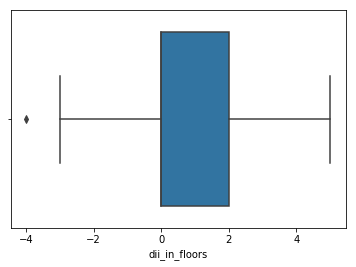

In [66]:
sns.boxplot(x=structure.dii_in_floors)

In [67]:
structure.loc[structure.dii_in_floors<0,'dii_in_floors']=1

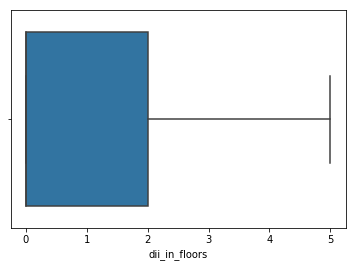

In [68]:
sns.boxplot(x=structure.dii_in_floors)

In [69]:
structure.dii_in_floors.value_counts()

0.0    633272
2.0    211369
1.0    106047
3.0     95321
4.0      5050
5.0      1889
Name: dii_in_floors, dtype: int64

In [70]:
structure=structure.drop('ward_id',axis=1)
structure=structure.drop('district_id',axis=1)
structure=structure.drop('vdcmun_id',axis=1)

In [71]:
structure=structure.drop('count_floors_pre_eq',axis=1)
structure=structure.drop('count_floors_post_eq',axis=1)
structure=structure.drop('height_ft_pre_eq',axis=1)
structure=structure.drop('height_ft_post_eq',axis=1)



In [72]:
structure['roof_type']=structure['roof_type'].astype(int)
structure['condition_post_eq']=structure['condition_post_eq'].astype(int)
structure['dii_in_floors']=structure['dii_in_floors'].astype(int)


In [73]:
structure['ground_floor_type']=structure['ground_floor_type'].astype(int)




In [74]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 24 columns):
building_id                               1052948 non-null object
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                         1052948 non-null int64
other_floor_type                          1052948 non-null object
position                                  1052948 non-null int64
plan_configuration                        1052948 non-null int64
has_superstructure_adobe_mud              1052948 non-null int64
has_superstructure_mud_mortar_stone       1052948 non-null int64
has_superstructure_stone_flag             1052948 non-null int64
has_superstructure_cement_mortar_stone  

In [75]:
structure['ground_floor_type']=structure['ground_floor_type'].astype(int)

In [76]:
structure=structure.drop('has_superstructure_rc_engineered',axis=1)

In [77]:
structure['stone']=structure['has_superstructure_mud_mortar_stone']+structure['has_superstructure_cement_mortar_stone']

In [78]:
structure.stone.value_counts()

1    805175
0    239325
2      8448
Name: stone, dtype: int64

In [79]:
structure['brick']=structure['has_superstructure_mud_mortar_brick']+structure['has_superstructure_cement_mortar_brick']

In [80]:
structure.brick.value_counts()

0    909474
1    136072
2      7402
Name: brick, dtype: int64

In [81]:
structure['wood']=structure['has_superstructure_bamboo']+structure['has_superstructure_timber']

In [82]:
structure.wood.value_counts()

0    775319
1    199849
2     77780
Name: wood, dtype: int64

In [83]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 26 columns):
building_id                               1052948 non-null object
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                         1052948 non-null int64
other_floor_type                          1052948 non-null object
position                                  1052948 non-null int64
plan_configuration                        1052948 non-null int64
has_superstructure_adobe_mud              1052948 non-null int64
has_superstructure_mud_mortar_stone       1052948 non-null int64
has_superstructure_stone_flag             1052948 non-null int64
has_superstructure_cement_mortar_stone  

In [84]:
structure=structure.drop('has_superstructure_mud_mortar_stone',axis=1)
structure=structure.drop('has_superstructure_cement_mortar_stone',axis=1)
structure=structure.drop('has_superstructure_timber',axis=1)
structure=structure.drop('has_superstructure_bamboo',axis=1)
structure=structure.drop('has_superstructure_mud_mortar_brick',axis=1)
structure=structure.drop('has_superstructure_cement_mortar_brick',axis=1)

In [85]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 20 columns):
building_id                             1052948 non-null object
age_building                            1052948 non-null int64
plinth_area_sq_ft                       1052948 non-null int64
land_surface_condition                  1052948 non-null int64
foundation_type                         1052948 non-null int64
roof_type                               1052948 non-null int64
ground_floor_type                       1052948 non-null int64
other_floor_type                        1052948 non-null object
position                                1052948 non-null int64
plan_configuration                      1052948 non-null int64
has_superstructure_adobe_mud            1052948 non-null int64
has_superstructure_stone_flag           1052948 non-null int64
has_superstructure_rc_non_engineered    1052948 non-null int64
has_superstructure_other                1052948 non-null int64
con

In [86]:
structure=structure.drop('other_floor_type',axis=1)

In [87]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 19 columns):
building_id                             1052948 non-null object
age_building                            1052948 non-null int64
plinth_area_sq_ft                       1052948 non-null int64
land_surface_condition                  1052948 non-null int64
foundation_type                         1052948 non-null int64
roof_type                               1052948 non-null int64
ground_floor_type                       1052948 non-null int64
position                                1052948 non-null int64
plan_configuration                      1052948 non-null int64
has_superstructure_adobe_mud            1052948 non-null int64
has_superstructure_stone_flag           1052948 non-null int64
has_superstructure_rc_non_engineered    1052948 non-null int64
has_superstructure_other                1052948 non-null int64
condition_post_eq                       1052948 non-null int64
diff

In [88]:
buil_owner.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [89]:
buil_owner=buil_owner.drop('has_secondary_use_institution',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_agriculture',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_hotel',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_rental',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_school',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_industry',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_health_post',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_gov_office',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_use_police',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_other',axis=1)

In [90]:
buil_owner=buil_owner.drop(['district_id'],axis=1)
buil_owner=buil_owner.drop(['ward_id'],axis=1)
buil_owner=buil_owner.drop(['vdcmun_id'],axis=1)

In [91]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 4 columns):
building_id               1052948 non-null object
legal_ownership_status    1052948 non-null object
count_families            1052946 non-null float64
has_secondary_use         1052938 non-null float64
dtypes: float64(2), object(2)
memory usage: 32.1+ MB


In [92]:
buil_owner['count_families']=buil_owner['count_families'].ffill()

In [93]:
buil_owner.loc[buil_owner.count_families >=5.0, 'count_families'] = np.nan

In [94]:
buil_owner['count_families']=buil_owner['count_families'].ffill()

In [95]:
buil_owner.count_families.value_counts()

1.0    913451
0.0     84363
2.0     46364
3.0      7127
4.0      1643
Name: count_families, dtype: int64

In [96]:
buil_owner.has_secondary_use.value_counts()

0.0    934839
1.0    118099
Name: has_secondary_use, dtype: int64

In [97]:
buil_owner['has_secondary_use']=buil_owner['has_secondary_use'].ffill()

In [98]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 4 columns):
building_id               1052948 non-null object
legal_ownership_status    1052948 non-null object
count_families            1052948 non-null float64
has_secondary_use         1052948 non-null float64
dtypes: float64(2), object(2)
memory usage: 32.1+ MB


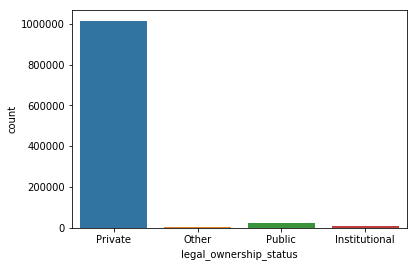

In [99]:
sns.countplot(x=buil_owner.legal_ownership_status)

In [100]:
buil_owner.legal_ownership_status.value_counts()

Private          1014042
Public             22326
Institutional      10502
Other               6078
Name: legal_ownership_status, dtype: int64

In [101]:
buil_owner['legal_ownership_status']=LabelEncoder().fit_transform(buil_owner['legal_ownership_status'])

In [102]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 4 columns):
building_id               1052948 non-null object
legal_ownership_status    1052948 non-null int64
count_families            1052948 non-null float64
has_secondary_use         1052948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 32.1+ MB


In [103]:
buil_owner['count_families']=buil_owner['count_families'].astype(int)
buil_owner['has_secondary_use']=buil_owner['has_secondary_use'].astype(int)


In [104]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 4 columns):
building_id               1052948 non-null object
legal_ownership_status    1052948 non-null int64
count_families            1052948 non-null int64
has_secondary_use         1052948 non-null int64
dtypes: int64(3), object(1)
memory usage: 32.1+ MB


In [105]:
zzzz=pd.merge(structure,buil_owner,on='building_id')

In [106]:
zzzz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052948 entries, 0 to 1052947
Data columns (total 22 columns):
building_id                             1052948 non-null object
age_building                            1052948 non-null int64
plinth_area_sq_ft                       1052948 non-null int64
land_surface_condition                  1052948 non-null int64
foundation_type                         1052948 non-null int64
roof_type                               1052948 non-null int64
ground_floor_type                       1052948 non-null int64
position                                1052948 non-null int64
plan_configuration                      1052948 non-null int64
has_superstructure_adobe_mud            1052948 non-null int64
has_superstructure_stone_flag           1052948 non-null int64
has_superstructure_rc_non_engineered    1052948 non-null int64
has_superstructure_other                1052948 non-null int64
condition_post_eq                       1052948 non-null int64
diff

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null object
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64


In [108]:
train['area_assesed']=LabelEncoder().fit_transform(train.area_assesed)

In [109]:
train.has_geotechnical_risk=train.has_geotechnical_risk.astype(int)


In [110]:
train.has_geotechnical_risk.value_counts()

0    553473
1     78288
Name: has_geotechnical_risk, dtype: int64

In [111]:
train=train.drop('has_geotechnical_risk_other',axis=1)

In [112]:
train=train.drop('has_geotechnical_risk_liquefaction',axis=1)

In [113]:
train['has_repair_started']=train.has_repair_started.ffill()

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 12 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null float64
vdcmun_id                                631761 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 57.8+ MB


In [115]:
train.has_geotechnical_risk_rock_fall.value_counts()

0    609742
1     22019
Name: has_geotechnical_risk_rock_fall, dtype: int64

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 12 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null float64
vdcmun_id                                631761 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 57.8+ MB


In [117]:
train['has_repair_started']=train['has_repair_started'].astype(int)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 12 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null int64
vdcmun_id                                631761 non-null int64
dtypes: int64(10), object(2)
memory usage: 57.8+ MB


In [119]:
final=pd.merge(train,zzzz,on='building_id')

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 13 columns):
area_assesed                             421175 non-null object
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null float64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_other              421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       399253 non-null float64
vdcmun_id                                421175 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 41.8+ MB


In [121]:
test.area_assesed=LabelEncoder().fit_transform(test['area_assesed'])

In [122]:
test['has_geotechnical_risk']=test['has_geotechnical_risk'].astype(int)

In [123]:
test['has_repair_started']=test['has_repair_started'].ffill()

In [124]:

test=test.drop('has_geotechnical_risk_other',axis=1)
test=test.drop('has_geotechnical_risk_liquefaction',axis=1)

In [125]:
test.has_repair_started=test.has_repair_started.astype(int)

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 11 columns):
area_assesed                             421175 non-null int64
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null int64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       421175 non-null int64
vdcmun_id                                421175 non-null int64
dtypes: int64(10), object(1)
memory usage: 35.3+ MB


In [127]:
fest=final['damage_grade']

In [128]:
testo=pd.merge(test,zzzz,on='building_id')

In [129]:
final['damage_grade']=LabelEncoder().fit_transform(final['damage_grade'])

In [130]:
train_Y=final['damage_grade']

In [131]:
final =final.drop(['damage_grade'],axis=1)

In [132]:
final=final.drop(['building_id'],axis=1)

In [133]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 31 columns):
area_assesed                             631761 non-null int64
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null int64
vdcmun_id                                631761 non-null int64
age_building                             631761 non-null int64
plinth_area_sq_ft                        631761 non-null int64
land_surface_condition                   631761 non-null int64
foundation_type                          631761 non-null int64
roof_ty

In [134]:
train_X=final

In [135]:
test_id=testo.building_id

In [136]:
testo=testo.drop('building_id',axis=1)

In [137]:
test_X=testo

In [138]:
X_train,X_test,y_train,y_test=train_test_split(train_X,train_Y,test_size=0.2,random_state=42)

In [139]:
from xgboost import XGBRegressor

In [140]:
model=XGBClassifier(max_depth=20,learning_rate=0.2,subsample=0.8,early_stopping_rounds=45,verbose_eval=.1,gamma=5)
model.fit(train_X, train_Y)
y_pred1 = model.predict(test_X)
predictions = [round(value) for value in y_pred1]


sub2 = pd.DataFrame({
    "building_id":test_id,
    "damage_grade":predictions
})
sub2['damage_grade']=sub2['damage_grade'].astype(int)

dam2=sub2['damage_grade']



for n,i in enumerate(dam2):
    if i==0:
        dam2[n]='Grade 1'
    elif i==1:
        dam2[n]='Grade 2'
    elif i==2:
        dam2[n]='Grade 3'
    elif i==3:
        dam2[n]='Grade 4'
    elif i==4:
        dam2[n]='Grade 5'
        
        
sub2.to_csv('submission6.csv',index=False)

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/piyush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/piyush/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
